# Finale Aufgabe für Praktikum Deep Learning <br>Textgenerierung mit RNN: Modelltraining

* **Name:** Fabian Schotte
* **Email:** fabian.schotte@rwu.de
* **Matrikelnummer:** 35604
* **Studiengang:** Angewandte Informatik

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pylab as plt
from work import models
import time 

os.makedirs("models", exist_ok=True)

2025-06-09 20:03:48.448799: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-09 20:03:48.455716: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749499428.464044  300622 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749499428.466586  300622 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-09 20:03:48.475101: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Vorbereitung


### Laden der Trainingsdaten

In [2]:
df_train = pd.read_csv('work/kaggle_sentiment/tweet_sentiment_train.csv', encoding='utf-8', encoding_errors='replace')
df_test = pd.read_csv('work/kaggle_sentiment/tweet_sentiment_test.csv', encoding='utf-8', encoding_errors='replace')

kaggle_text_train = df_train['text'].str.cat(sep='\n')
kaggle_text_test = df_test['text'].str.cat(sep='\n')
# kaggle_text = kaggle_text_train + '\n' + kaggle_text_test
kaggle_text = kaggle_text_train
# kaggle_text = kaggle_text_test

print(kaggle_text[:500])

 I`d have responded, if I were going
 Sooo SAD I will miss you here in San Diego!!!
my boss is bullying me...
 what interview! leave me alone
 Sons of ****, why couldn`t they put them on the releases we already bought
http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth
2am feedings for the baby are fun when he is all smiles and coos
Soooo high
 Both of you
 Journey!? Wow... u just became cooler.  hehe... (is that possible!?)
 as much as i love to be hopef


In [3]:
vocab = sorted(set(kaggle_text))
print(vocab)
print(f"vocab size = {len(vocab)}")

['\t', '\n', ' ', '!', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\xa0', '´', '½', '¿', 'Â', 'ï']
vocab size = 102


## Preprocessing

In [4]:
# example_texts = ['hello world', 'hello world']
# chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
# chars

In [5]:
ids_from_chars = keras.layers.StringLookup(vocabulary=list(vocab), mask_token=None)
# ids = ids_from_chars(chars)
# print(ids)

chars_from_ids = keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)
# chars = chars_from_ids(ids)
# print(chars)

# tf.strings.reduce_join(chars, axis=-1).numpy()

I0000 00:00:1749499429.875933  300622 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8012 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:01:00.0, compute capability: 8.9


In [6]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

In [7]:
all_ids = ids_from_chars(tf.strings.unicode_split(kaggle_text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(1905188,), dtype=int64, numpy=array([ 3, 43, 66, ..., 85, 11, 11])>

In [8]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

 
I
`
d
 
h
a
v
e
 


2025-06-09 20:03:50.252845: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
seq_length = 100

In [10]:
sequences = ids_dataset.batch(seq_length + 1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq).numpy())
for seq in sequences.take(1):
  print(text_from_ids(seq).numpy())

[b' ' b'I' b'`' b'd' b' ' b'h' b'a' b'v' b'e' b' ' b'r' b'e' b's' b'p'
 b'o' b'n' b'd' b'e' b'd' b',' b' ' b'i' b'f' b' ' b'I' b' ' b'w' b'e'
 b'r' b'e' b' ' b'g' b'o' b'i' b'n' b'g' b'\n' b' ' b'S' b'o' b'o' b'o'
 b' ' b'S' b'A' b'D' b' ' b'I' b' ' b'w' b'i' b'l' b'l' b' ' b'm' b'i'
 b's' b's' b' ' b'y' b'o' b'u' b' ' b'h' b'e' b'r' b'e' b' ' b'i' b'n'
 b' ' b'S' b'a' b'n' b' ' b'D' b'i' b'e' b'g' b'o' b'!' b'!' b'!' b'\n'
 b'm' b'y' b' ' b'b' b'o' b's' b's' b' ' b'i' b's' b' ' b'b' b'u' b'l'
 b'l' b'y' b'i']
b' I`d have responded, if I were going\n Sooo SAD I will miss you here in San Diego!!!\nmy boss is bullyi'


2025-06-09 20:03:50.309053: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [12]:
# split_input_target(list("Tensorflow"))

In [13]:
dataset = sequences.map(split_input_target)
len(dataset)

18863

In [14]:
for input_example, target_example in dataset.take(1):
    print("Input:", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())
    print("Input shape:", input_example.shape)
    print("Target shape:", target_example.shape)

Input: b' I`d have responded, if I were going\n Sooo SAD I will miss you here in San Diego!!!\nmy boss is bully'
Target: b'I`d have responded, if I were going\n Sooo SAD I will miss you here in San Diego!!!\nmy boss is bullyi'
Input shape: (100,)
Target shape: (100,)


2025-06-09 20:03:50.404611: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [15]:
BATCH_SIZE = 150
BUFFER_SIZE = 1000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(150, 100), dtype=tf.int64, name=None), TensorSpec(shape=(150, 100), dtype=tf.int64, name=None))>

In [16]:
vocab_size = len(ids_from_chars.get_vocabulary())
embedding_dim = 256
rnn_units = 2048

### 1. GRU-Modell

In [17]:
vocab_size_1 = len(ids_from_chars.get_vocabulary())
embedding_dim_1 = 256
rnn_units_1 = 2048

In [18]:
inputs_1 = keras.layers.Input(shape=(None,), dtype='int32', name='input_tokens')
embedding_1 = keras.layers.Embedding(input_dim=vocab_size_1, output_dim=embedding_dim_1)(inputs_1)
gru_1, gru_state_1 = keras.layers.GRU(units=rnn_units_1, return_sequences=True, return_state=True)(embedding_1)
gru_1, gru_state_1 = keras.layers.GRU(units=rnn_units_1, return_sequences=True, return_state=True)(gru_1)
outputs_1 = keras.layers.Dense(units=vocab_size, activation='softmax')(gru_1)

gru_model_1 =  keras.Model(inputs=inputs_1, outputs=outputs_1)

#### Testen des Modells

In [19]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions_model_1 = gru_model_1(input_example_batch)
    print(example_batch_predictions_model_1.shape, "# (batch_size, sequence_length, vocab_size)")

(150, 100, 103) # (batch_size, sequence_length, vocab_size)


I0000 00:00:1749499435.217958  300752 cuda_dnn.cc:529] Loaded cuDNN version 90501


In [20]:
gru_model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_tokens (InputLayer)       │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, None, 256)      │        26,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ [(None, None, 2048),   │    14,168,064 │
│                                 │ (None, 2048)]          │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ [(None, None, 2048),   │    25,178,112 │
│                                 │ (None, 2048)]          │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, None, 103)      │       211,047 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,583,591 (151.00 MB)

 Trainable params: 39,583,591 (151.00 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
sampled_indices_model_1 = tf.random.categorical(example_batch_predictions_model_1[0], num_samples=1)
sampled_indices_model_1 = tf.squeeze(sampled_indices_model_1, axis=-1).numpy()
sampled_indices_model_1

array([ 17,  15,  80,  78,  28,  97,  88,  37,  25,  55,  51,  11,  17,
        34,  43,  74,  12,  10,  15,  12,  55,  79,  35,   2,  20,  16,
        32,  45,  69,  66,  51,  28,  53,  24,  52,  28,  60,  51,  42,
        33,   4,  48, 102,  96,   1,  94,  50,  85,  42,   0,  46,  83,
        90,   7,  42,  66,  50,   8,  84,  80,  76,  33,  16,  84,  34,
        93,  35,   9,  66,  85,  51, 102,  48,  75,  86,  48,  63,  95,
        34,  62,   5,  75,  99,  55,  54,  57,  55,  35,  40,  61,  46,
        47,  85,  18,  73,   4,  45,  54,  14,  42])

In [22]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices_model_1).numpy())

Input:
 b'ay\ncomes home in two days\n Sadly no. It didn`t come with one...\nCant wait to see my boy tomorrow\n eh'

Next Char Predictions:
 b"/-nl:\xc2\xa0vC7UQ)/@Ih*(-*UmA\n2.>Kc`Q:S6R:ZQH?!N\xc3\xaf~\t|PsH[UNK]Lqx%H`P&rnj?.r@{A'`sQ\xc3\xafNitN]}@\\#i\xc2\xbdUTWUAF[LMs0g!KT,H"


### Training

#### Loss

In [23]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [24]:
example_batch_mean_loss_model_1 = loss(target_example_batch, example_batch_predictions_model_1)
print("Prediction shape: ", example_batch_predictions_model_1.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss_model_1)

Prediction shape:  (150, 100, 103)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.634062, shape=(), dtype=float32)


/opt/conda/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [25]:
tf.exp(example_batch_mean_loss_model_1).numpy()

np.float32(102.931305)

#### Optimizer

In [26]:
gru_model_1.compile(optimizer='adam', loss=loss, metrics=['accuracy'], run_eagerly=True)

#### Early Stopping

In [27]:
early_stopping_gru_model_1 = keras.callbacks.EarlyStopping(monitor="loss", min_delta=0.002, patience=2)

#### Konfiguration von Checkpoints

In [28]:
checkpoint_dir = './work/training_checkpoints/gru_model_1'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")

checkpoint_callback_gru_model_1=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

#### Ausführen des Trainings

In [29]:
EPOCHS = 30

In [30]:
start = time.perf_counter()
gru_model_1_history = gru_model_1.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback_gru_model_1, early_stopping_gru_model_1])
end = time.perf_counter()
gru_model_1_training_time = end - start

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 261ms/step - accuracy: 0.1881 - loss: 3.6060
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 264ms/step - accuracy: 0.3946 - loss: 2.1938
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 263ms/step - accuracy: 0.4885 - loss: 1.8243
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 264ms/step - accuracy: 0.5286 - loss: 1.6596
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 263ms/step - accuracy: 0.5521 - loss: 1.5638
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 263ms/step - accuracy: 0.5696 - loss: 1.4886
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 262ms/step - accuracy: 0.5871 - loss: 1.4172
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 262ms/step - accuracy: 0.6060 - loss: 1.3407
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 264ms/step - accuracy: 0.6280 - loss: 1.2567
Epoch 10/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 265ms/step - accuracy: 0.6540 - loss: 1.1630
Epoch 11/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 263ms/step - accuracy: 0.6839 - loss: 1.0590
Epoch 12/30
125/125

#### Speichern

In [31]:
gru_model_1.save('work/models/gru_model_1.keras')

### 2. GRU-Modell

In [32]:
vocab_size_2 = len(ids_from_chars.get_vocabulary())
embedding_dim_2 = 256
rnn_units_2 = 1024

In [61]:
inputs_2 = keras.layers.Input(shape=(None,), dtype='int32', name='input_tokens')
embedding_2 = keras.layers.Embedding(input_dim=vocab_size_2, output_dim=embedding_dim_2)(inputs_2)
gru_2, gru_state_2 = keras.layers.GRU(units=rnn_units_2, return_sequences=True, return_state=True)(embedding_2)
dropout_2 = keras.layers.Dropout(0.2)(gru_2)
gru_2, gru_state_2 = keras.layers.GRU(units=rnn_units_2, return_sequences=True, return_state=True)(dropout_2)
outputs_2 = keras.layers.Dense(units=vocab_size, activation='softmax')(gru_2)

gru_model_2 = keras.Model(inputs=inputs_2, outputs=outputs_2)

#### Testen des Modells

In [62]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions_gru_model_2 = gru_model_2(input_example_batch)
    print(example_batch_predictions_gru_model_2.shape, "# (batch_size, sequence_length, vocab_size)")

(150, 100, 103) # (batch_size, sequence_length, vocab_size)


2025-06-09 20:26:36.864798: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [63]:
gru_model_2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_tokens (InputLayer)       │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ (None, None, 256)      │        26,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ [(None, None, 1024),   │     3,938,304 │
│                                 │ (None, 1024)]          │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, None, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ [(None, None, 1024),   │     6,297,600 │
│                                 │ (None, 1024)]          │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, None, 103)      │       105,575 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,367,847 (39.55 MB)

 Trainable params: 10,367,847 (39.55 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
sampled_indices_gru_model_2 = tf.random.categorical(example_batch_predictions_gru_model_2[0], num_samples=1)
sampled_indices_gru_model_2 = tf.squeeze(sampled_indices_gru_model_2, axis=-1).numpy()
sampled_indices_gru_model_2

array([ 64,  69,  32,  12,  34,  91,  54,  19,  10,  26,  62,  56,  53,
         6,  81,  43,  66,   8,  20,  56,  18,  80,  83,  38,   3,  14,
        14,  38,  45,  36,  22,  23,  50,  59,  31,  52,  51,  27,  80,
        15,  92,  59,  95,  22,  47,   2,  12,  87,  89,  52,  11,   9,
        65,   6,  85,   2,   7,  15,  91,  79,  90,  36,  18,  93,  22,
        23,  62, 102,  64,  81,  29,  34,  60,   5,  88,  29,  83,  85,
        52,  51,  46,  79,  96, 102,  66,  51,  14,  72,  87,  69,  27,
        78,  78,  98,  57, 101,  26,  84,  56, 102])

In [65]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices_gru_model_2).numpy())

Input:
 b'at one out  pain in the **** them spammers\nhe wasn`t there today   my free day from when the bell ra'

Next Char Predictions:
 b"^c>*@yT1(8\\VS$oI`&2V0nqD ,,DKB45PY=RQ9n-zY}4M\n*uwR)'_$s\n%-ymxB0{45\\\xc3\xaf^o;@Z#v;qsRQLm~\xc3\xaf`Q,fuc9ll\xc2\xb4W\xc3\x828rV\xc3\xaf"


### Training

#### Loss

In [66]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [67]:
example_batch_mean_loss_model_2 = loss(target_example_batch, example_batch_predictions_gru_model_2)
print("Prediction shape: ", example_batch_predictions_gru_model_2.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss_model_2)

Prediction shape:  (150, 100, 103)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.6348906, shape=(), dtype=float32)


In [68]:
tf.exp(example_batch_mean_loss_model_1).numpy()

np.float32(102.931305)

#### Optimizer

In [69]:
gru_model_2.compile(optimizer='adam', loss=loss, metrics=['accuracy'], run_eagerly=True)

#### Early Stopping

In [70]:
early_stopping_model_2 = keras.callbacks.EarlyStopping(monitor="loss", min_delta=0.002, patience=2)

#### Konfiguration von Checkpoints

In [71]:
checkpoint_dir = './work/training_checkpoints/gru_model_2'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")

checkpoint_callback_gru_model_2=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

#### Ausführen des Trainings

In [72]:
EPOCHS = 30

In [73]:
start = time.perf_counter()
gru_model_2_history = gru_model_2.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback_gru_model_2, early_stopping_model_2])
end = time.perf_counter()
gru_model_2_training_time = end - start

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - accuracy: 0.1894 - loss: 3.5401
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - accuracy: 0.3892 - loss: 2.2079
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - accuracy: 0.4784 - loss: 1.8600
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - accuracy: 0.5157 - loss: 1.7085
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - accuracy: 0.5368 - loss: 1.6230
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - accuracy: 0.5513 - loss: 1.5640
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.5631 - loss: 1.5161
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - accuracy: 0.5725 - loss: 1.4750
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 118ms/step - accuracy: 0.5820 - loss: 1.4367
Epoch 10/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.5910 - loss: 1.3990
Epoch 11/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.5994 - loss: 1.3642
Epoch 12/30
125/125

### Speichern

In [74]:
gru_model_2.save('work/models/gru_model_2.keras')

## Bewertung und Vergleich der GRU-Modelle

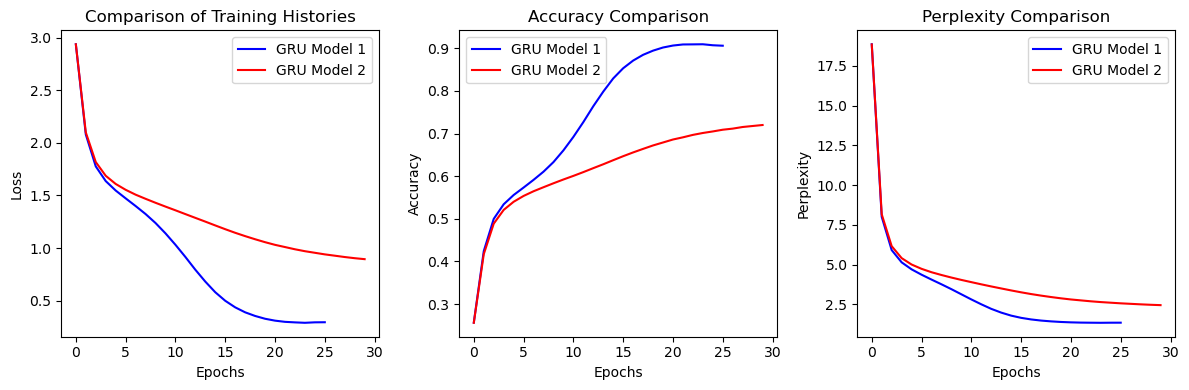

Loss:
 GRU Model 1: 0.29578548669815063
 GRU Model 2: 0.8950479030609131
Accuracy:
 GRU Model 1: 0.9061941504478455
 GRU Model 2: 0.7201036214828491
Perplexity:
 GRU Model 1: 1.3441817810308012
 GRU Model 2: 2.447453027145708
Training Times:
 GRU Model 1: 857.122924s
 GRU Model 2: 451.226709s


In [75]:
loss1 = gru_model_1_history.history['loss']
loss2 = gru_model_2_history.history['loss']

accuracy1 = gru_model_1_history.history['accuracy']
accuracy2 = gru_model_2_history.history['accuracy']

perplexity1 = np.exp(loss1)
perplexity2 = np.exp(loss2)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4)) 

axes[0].plot(loss1, label="GRU Model 1", linestyle='-', color='blue')
axes[0].plot(loss2, label="GRU Model 2", linestyle='-', color='red')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].set_title("Comparison of Training Histories")
axes[0].legend()

axes[1].plot(accuracy1, label="GRU Model 1", linestyle='-', color='blue')
axes[1].plot(accuracy2, label="GRU Model 2", linestyle='-', color='red')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Accuracy Comparison")
axes[1].legend()

axes[2].plot(perplexity1, label="GRU Model 1", linestyle='-', color='blue')
axes[2].plot(perplexity2, label="GRU Model 2", linestyle='-', color='red')
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Perplexity")
axes[2].set_title("Perplexity Comparison")
axes[2].legend()

plt.tight_layout()

plt.show()

print("Loss:")
print(f" GRU Model 1: {loss1[-1]}")
print(f" GRU Model 2: {loss2[-1]}")
print("Accuracy:")
print(f" GRU Model 1: {accuracy1[-1]}")
print(f" GRU Model 2: {accuracy2[-1]}")
print("Perplexity:")
print(f" GRU Model 1: {perplexity1[-1]}")
print(f" GRU Model 2: {perplexity2[-1]}")
print("Training Times:")
print(f" GRU Model 1: {gru_model_1_training_time:2f}s")
print(f" GRU Model 2: {gru_model_2_training_time:2f}s")


### LSTM-Modell

In [76]:
vocab_size_lstm = len(ids_from_chars.get_vocabulary())
embedding_dim_lstm = 256
rnn_units_lstm = 2048

In [77]:

inputs_lstm = keras.layers.Input(shape=(None,), dtype='int32', name='input_tokens')
embedding_lstm = keras.layers.Embedding(input_dim=vocab_size_lstm, output_dim=embedding_dim_lstm)(inputs_lstm)
lstm, hidden_state_1, cell_state_1 = keras.layers.LSTM(units=rnn_units_lstm, return_sequences=True, return_state=True)(embedding_lstm)
lstm, hidden_state_2, cell_state_2 = keras.layers.LSTM(units=rnn_units_lstm, return_sequences=True, return_state=True)(lstm)
outputs_lstm = keras.layers.Dense(units=vocab_size, activation='softmax')(lstm)

lstm_model = keras.Model(inputs=inputs_lstm, outputs=outputs_lstm)

#### Testen des Modells

In [78]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions_lstm_model = lstm_model(input_example_batch)
    print(example_batch_predictions_lstm_model.shape, "# (batch_size, sequence_length, vocab_size)")

(150, 100, 103) # (batch_size, sequence_length, vocab_size)


In [79]:
lstm_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_tokens (InputLayer)       │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_4 (Embedding)         │ (None, None, 256)      │        26,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ [(None, None, 2048),   │    18,882,560 │
│                                 │ (None, 2048), (None,   │               │
│                                 │ 2048)]                 │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ [(None, None, 2048),   │    33,562,624 │
│                                 │ (None, 2048), (None,   │               │
│                                 │ 2048)]                 │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, None, 103)      │       211,047 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,682,599 (200.97 MB)

 Trainable params: 52,682,599 (200.97 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
sampled_indices_lstm_model = tf.random.categorical(example_batch_predictions_lstm_model[0], num_samples=1)
sampled_indices_lstm_model = tf.squeeze(sampled_indices_lstm_model, axis=-1).numpy()
sampled_indices_lstm_model

array([ 87,  37,  91,  89,  74,  34,  92,  46,   8,  78,  19,  72,  32,
        13,  72,  62,  89,  88,  43,   5,  64,  94,  47,   6,  37,  98,
        73,  47,  64,  21,  30,  85,  86,  29,  93,  14,  32,  97,  14,
        43,  49,   0,  94,  58,  81,  87,  42,  44,  37,  54,   3,  98,
        84,  53,  90,  95,   3,  44,  26,  21,  84,  48,  85,  33,  25,
        78,  39,  40,  88,  45,  62,  83,  81,   1,  56,  85, 102,  87,
        34,  84,   7,  99,  88,  92,  64,  65,  58,  44,   6,  93,  54,
        86,  21,  95,  28,  28,  84,  45,  50,  49])

In [81]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices_gru_model_2).numpy())

Input:
 b'odayyy  I don`t feel confident about anyy.\ngraduation is done  im a little sad.. anyone want to hang'

Next Char Predictions:
 b"^c>*@yT1(8\\VS$oI`&2V0nqD ,,DKB45PY=RQ9n-zY}4M\n*uwR)'_$s\n%-ymxB0{45\\\xc3\xaf^o;@Z#v;qsRQLm~\xc3\xaf`Q,fuc9ll\xc2\xb4W\xc3\x828rV\xc3\xaf"


### Training

#### Loss

In [82]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [83]:
example_batch_mean_loss_lstm_model = loss(target_example_batch, example_batch_predictions_lstm_model)
print("Prediction shape: ", example_batch_predictions_lstm_model.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss_lstm_model)

Prediction shape:  (150, 100, 103)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.6345468, shape=(), dtype=float32)


In [84]:
tf.exp(example_batch_mean_loss_lstm_model).numpy()

np.float32(102.98123)

#### Optimizer

In [85]:
lstm_model.compile(optimizer='adam', loss=loss, metrics=['accuracy'], run_eagerly=True)

#### Konfiguration von Checkpoints

In [86]:
checkpoint_dir = './work/training_checkpoints/lstm_model'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")

checkpoint_callback_gru_model_2=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

#### Ausführen des Trainings

In [87]:
EPOCHS = 30

In [88]:
start = time.perf_counter()
lstm_model_history = lstm_model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback_gru_model_2, early_stopping_model_2])
end = time.perf_counter()
lstm_model_training_time = end - start

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 297ms/step - accuracy: 0.1597 - loss: 3.8579
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 296ms/step - accuracy: 0.2797 - loss: 2.6991
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 296ms/step - accuracy: 0.3953 - loss: 2.1929
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 296ms/step - accuracy: 0.4671 - loss: 1.9103
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 299ms/step - accuracy: 0.5031 - loss: 1.7643
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 298ms/step - accuracy: 0.5252 - loss: 1.6754
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 296ms/step - accuracy: 0.5410 - loss: 1.6111
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 296ms/step - accuracy: 0.5532 - loss: 1.5627
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 295ms/step - accuracy: 0.5633 - loss: 1.5199
Epoch 10/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 298ms/step - accuracy: 0.5725 - loss: 1.4829
Epoch 11/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 286ms/step - accuracy: 0.5818 - loss: 1.4466
Epoch 12/30
125/125

#### Speichern

In [89]:
lstm_model.save('work/models/lstm_model.keras')

## Vergleich aller Modelle

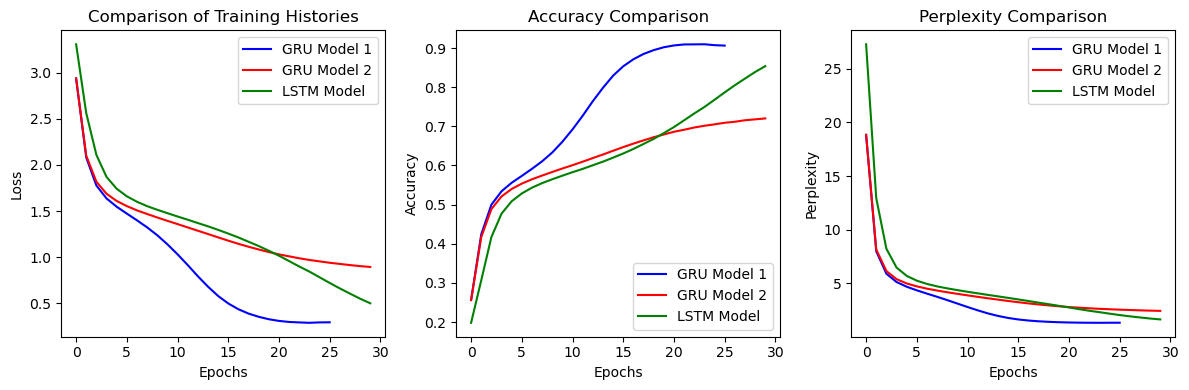

Loss:
 GRU Model 1: 0.29578548669815063
 GRU Model 2: 0.8950479030609131
 LSTM Model:  0.5019716024398804
Accuracy:
 GRU Model 1: 0.9061941504478455
 GRU Model 2: 0.7201036214828491
 LSTM Model:  0.8537558317184448
Perplexity:
 GRU Model 1: 1.3441817810308012
 GRU Model 2: 2.447453027145708
 LSTM Model:  1.6519751001551413
Training Times:
 GRU Model 1: 857.122924s
 GRU Model 2: 451.226709s
 LSTM Model:  1076.347619s


In [91]:
loss1 = gru_model_1_history.history['loss']
loss2 = gru_model_2_history.history['loss']
loss3 = lstm_model_history.history['loss']

accuracy1 = gru_model_1_history.history['accuracy']
accuracy2 = gru_model_2_history.history['accuracy']
accuracy3 = lstm_model_history.history['accuracy']

perplexity1 = np.exp(loss1)
perplexity2 = np.exp(loss2)
perplexity3 = np.exp(loss3)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4)) 

axes[0].plot(loss1, label="GRU Model 1", linestyle='-', color='blue')
axes[0].plot(loss2, label="GRU Model 2", linestyle='-', color='red')
axes[0].plot(loss3, label="LSTM Model", linestyle='-', color='green')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].set_title("Comparison of Training Histories")
axes[0].legend()

axes[1].plot(accuracy1, label="GRU Model 1", linestyle='-', color='blue')
axes[1].plot(accuracy2, label="GRU Model 2", linestyle='-', color='red')
axes[1].plot(accuracy3, label="LSTM Model", linestyle='-', color='green')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Accuracy Comparison")
axes[1].legend()

axes[2].plot(perplexity1, label="GRU Model 1", linestyle='-', color='blue')
axes[2].plot(perplexity2, label="GRU Model 2", linestyle='-', color='red')
axes[2].plot(perplexity3, label="LSTM Model", linestyle='-', color='green')
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Perplexity")
axes[2].set_title("Perplexity Comparison")
axes[2].legend()

plt.tight_layout()

plt.show()
print("Loss:")
print(f" GRU Model 1: {loss1[-1]}")
print(f" GRU Model 2: {loss2[-1]}")
print(f" LSTM Model:  {loss3[-1]}")
print("Accuracy:")
print(f" GRU Model 1: {accuracy1[-1]}")
print(f" GRU Model 2: {accuracy2[-1]}")
print(f" LSTM Model:  {accuracy3[-1]}")
print("Perplexity:")
print(f" GRU Model 1: {perplexity1[-1]}")
print(f" GRU Model 2: {perplexity2[-1]}")
print(f" LSTM Model:  {perplexity3[-1]}")
print("Training Times:")
print(f" GRU Model 1: {gru_model_1_training_time:2f}s")
print(f" GRU Model 2: {gru_model_2_training_time:2f}s")
print(f" LSTM Model:  {lstm_model_training_time:2f}s")